# Sınıflandırma Problemleri

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

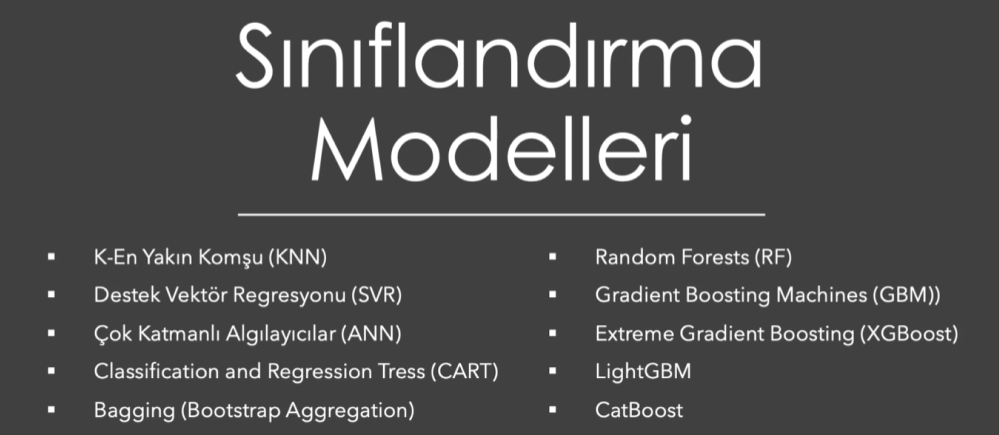

# Lojistik Regresyon 

Amaç sınıflandırma problemi için bağımlı ve bağımsız değişkenler arasındaki ilişkiyi tanımlayan doğrusal bir model kurmaktır

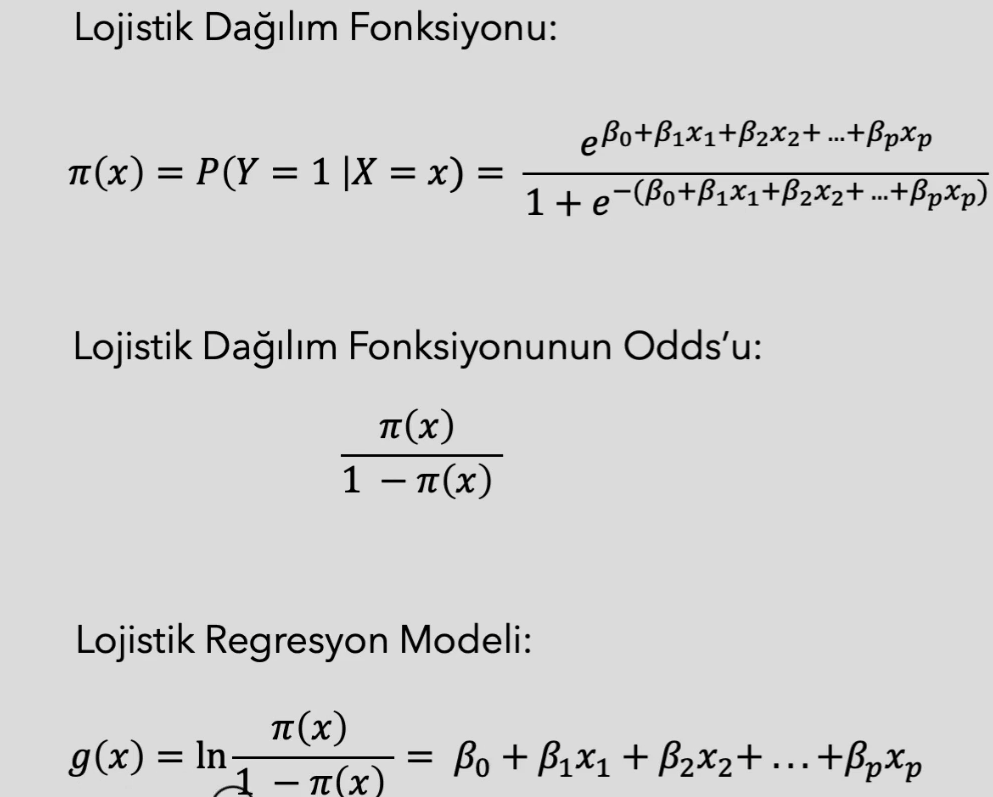

resim, lojistik dağılım fonksiyonunu ve odds'u gösterir. Lojistik dağılım fonksiyonu, bir olayın gerçekleşme olasılığını tahmin etmek için kullanılır. Odds ise bir olayın gerçekleşme olasılığının, gerçekleşmeme olasılığına oranıdır.

Lojistik dağılım fonksiyonu:

π(x) = P(Y = 1 | X = x) = e^(Bo + B1x1 + B2X2 + ... + BpXp) / (1 + e^(Bo + B1x1 + B2X2 + ... + BpXp))

Lojistik dağılım fonksiyonunun odds'u:

π(x) / (1 - π(x))
Resimde yer alan terimlerin anlamları:

π(x): Olayın gerçekleşme olasılığı
Bo: Sabit bir terim
B1, B2, ..., Bp: Bağımsız değişkenlerin katsayıları
x1, x2, ..., xp: Bağımsız değişkenler

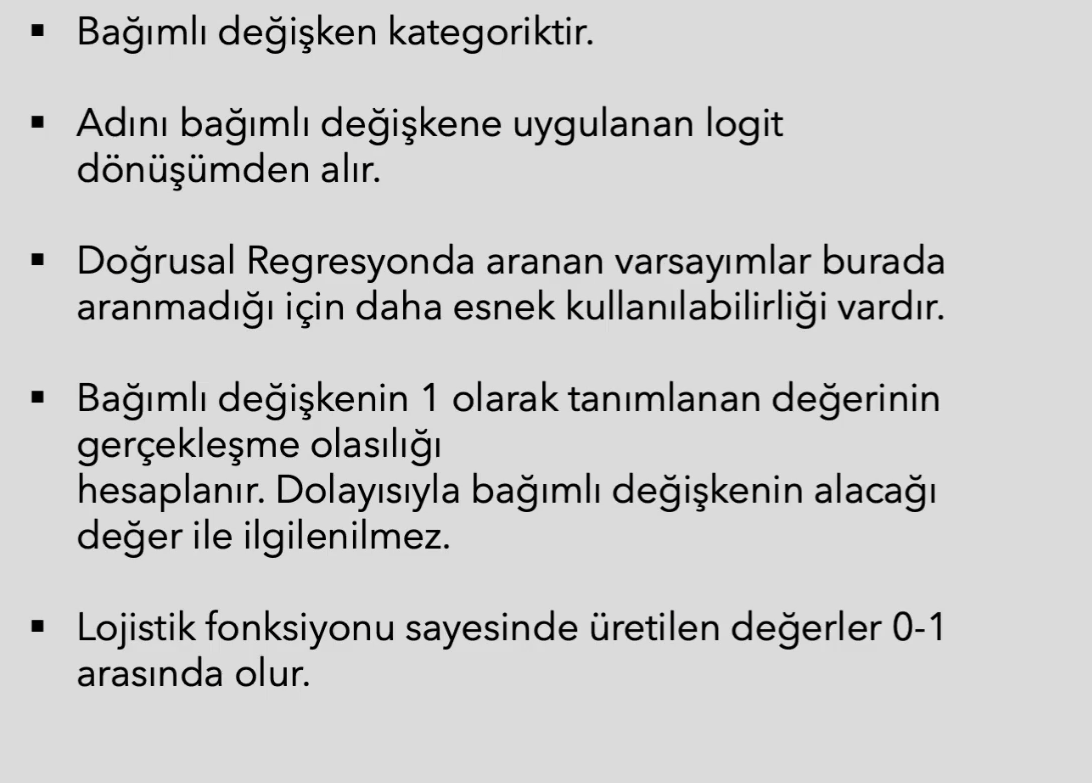

## Model 

In [2]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

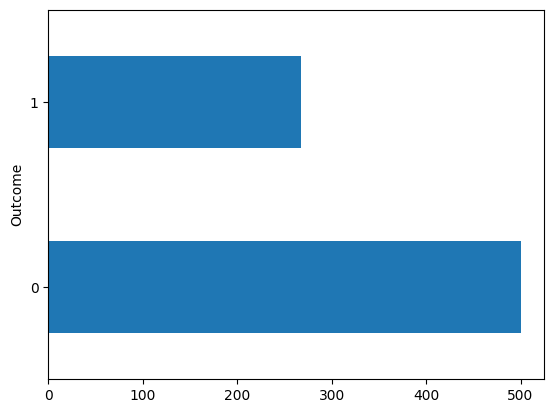

In [7]:
df["Outcome"].value_counts().plot.barh();

In [8]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [9]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [10]:
#statsmodels

In [11]:
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Fri, 09 Feb 2024   Pseudo R-squ.:                 0.05922
Time:                        01:44:26   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

In [12]:
#scikit-learn

In [13]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [14]:
loj_model.intercept_

array([-5.87553575])

In [15]:
loj_model.coef_

array([[ 1.17012910e-01,  2.83439995e-02, -1.69141528e-02,
         7.57716409e-04, -6.38967904e-04,  5.95854629e-02,
         6.74786680e-01,  7.19201366e-03]])

## Tahmin & Model Tuning

In [16]:
y_pred = loj_model.predict(X)

In [17]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [18]:
accuracy_score(y, y_pred)

0.7747395833333334

In [19]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [20]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [21]:
loj_model.predict_proba(X)[0:10][:,0:2]

array([[0.35093811, 0.64906189],
       [0.91674089, 0.08325911],
       [0.22496628, 0.77503372],
       [0.92105754, 0.07894246],
       [0.16804013, 0.83195987],
       [0.7985786 , 0.2014214 ],
       [0.87972898, 0.12027102],
       [0.27757751, 0.72242249],
       [0.32070047, 0.67929953],
       [0.92239001, 0.07760999]])

In [22]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [23]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [24]:
y_probs[0:10]

array([0.64906189, 0.08325911, 0.77503372, 0.07894246, 0.83195987,
       0.2014214 , 0.12027102, 0.72242249, 0.67929953, 0.07760999])

In [25]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [26]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [27]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [28]:
accuracy_score(y, y_pred)

0.7747395833333334

In [29]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [30]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.64906189, 0.08325911, 0.77503372, 0.07894246, 0.83195987])

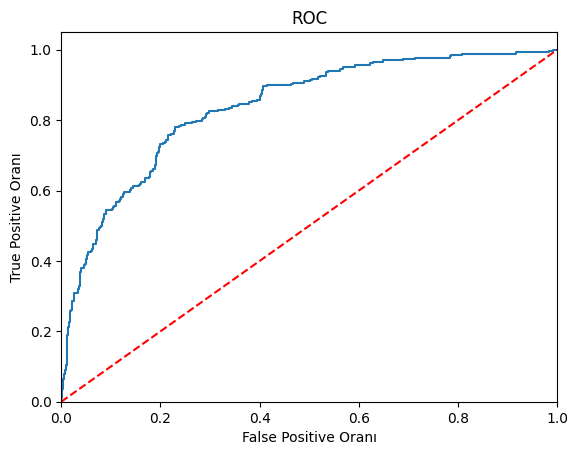

In [31]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)


In [33]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [34]:
accuracy_score(y_test, loj_model.predict(X_test))

0.7532467532467533

In [35]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.7661231884057972

# Gaussian Naive Bayes

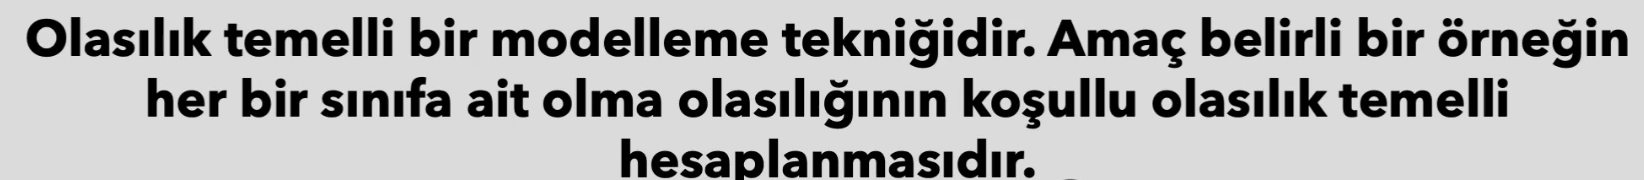

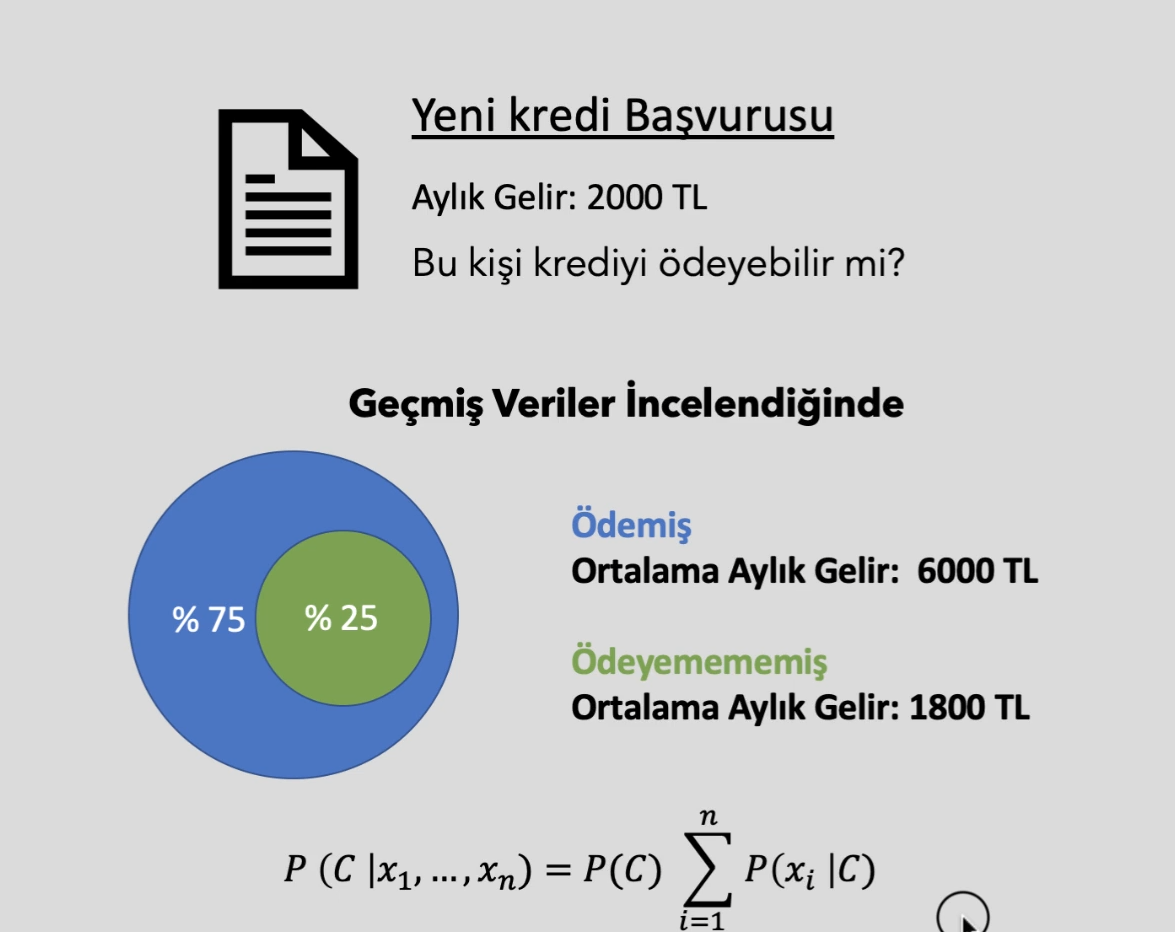


Gaussian Naive Bayes, sürekli veri kümeleri için Naive Bayes'in bir uzantısıdır.

Her sınıfın özelliklerinin normal dağılıma uyduğunu varsayar.

Basit, hızlı ve az veriyle kullanılabilen bir algoritmadır.

Özelliklerin bağımsız olma varsayımı her zaman doğru olmayabilir.

In [36]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)



In [37]:
from sklearn.naive_bayes import GaussianNB

In [38]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [39]:
nb_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [40]:
nb_model.predict_proba(X_test)[0:10]

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [41]:
y_pred = nb_model.predict(X_test)

In [42]:
accuracy_score(y_test, y_pred)

0.7445887445887446

In [43]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.775

# KNN

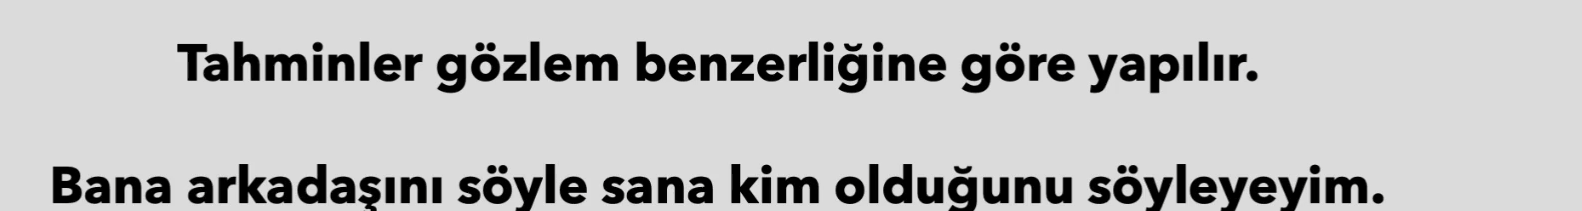

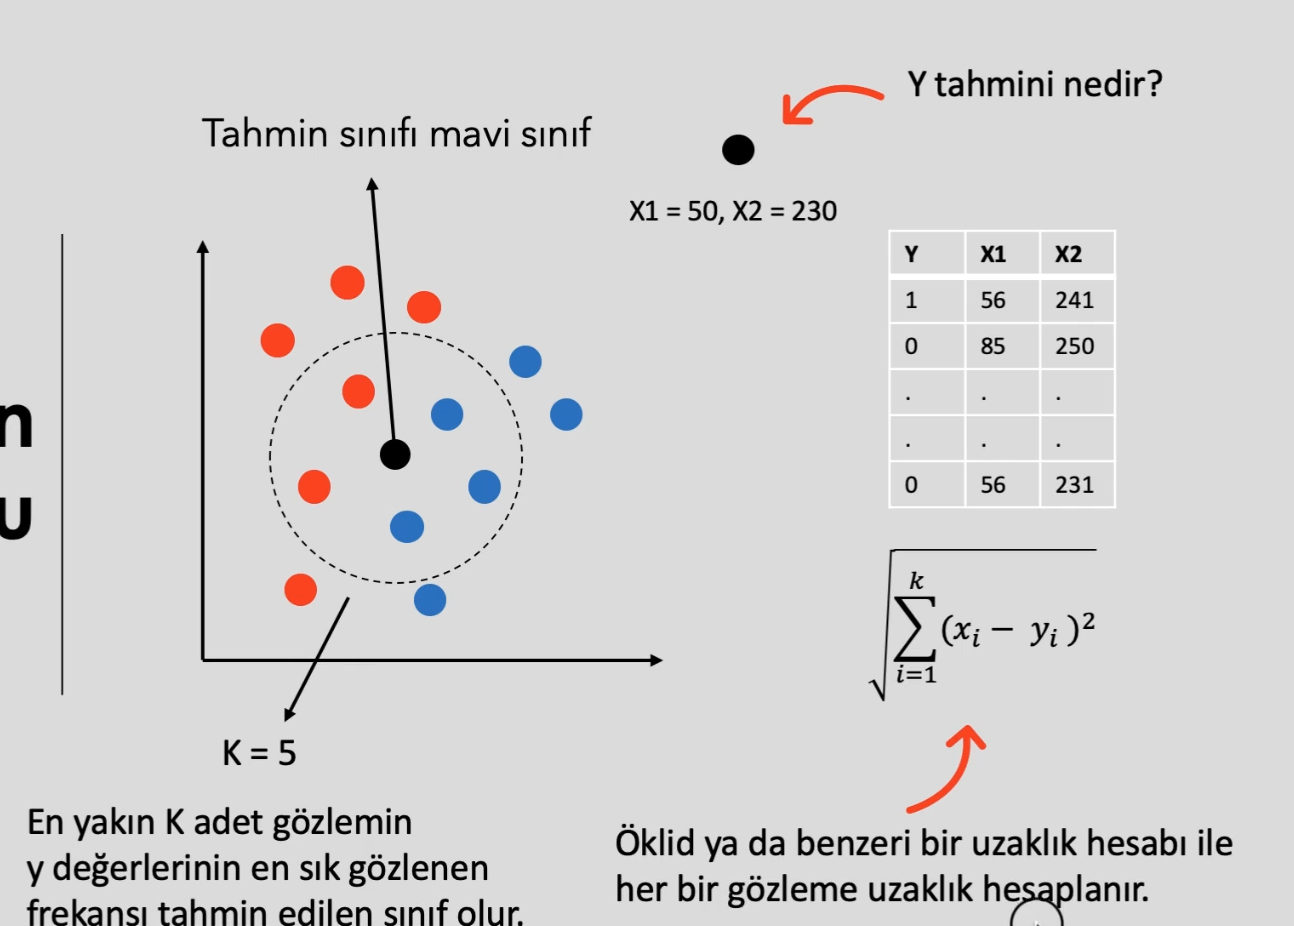

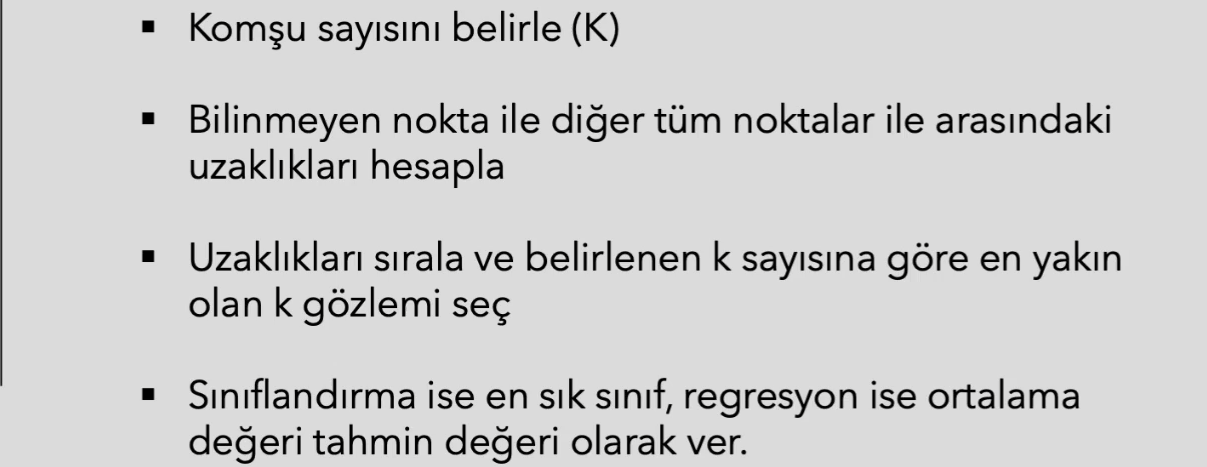

## Model & Tahmin

In [44]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [45]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [46]:
y_pred = knn_model.predict(X_test)

In [47]:
accuracy_score(y_test, y_pred)

0.6883116883116883

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



## Model Tuning

In [49]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [50]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [51]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.748637316561845
En iyi parametreler: {'n_neighbors': 11}


In [52]:
knn = KNeighborsClassifier(n_neighbors=11)
knn_tuned = knn.fit(X_train, y_train)

In [53]:
knn_tuned.score(X_test, y_test)

0.7316017316017316

In [54]:
y_pred = knn_tuned.predict(X_test)

In [55]:
accuracy_score(y_test, y_pred)

0.7316017316017316

# SVC

Amaç iki sınıf arasındaki ayrımın optimum olmasını sağlayacak hiper-düzlemi bulmaktır

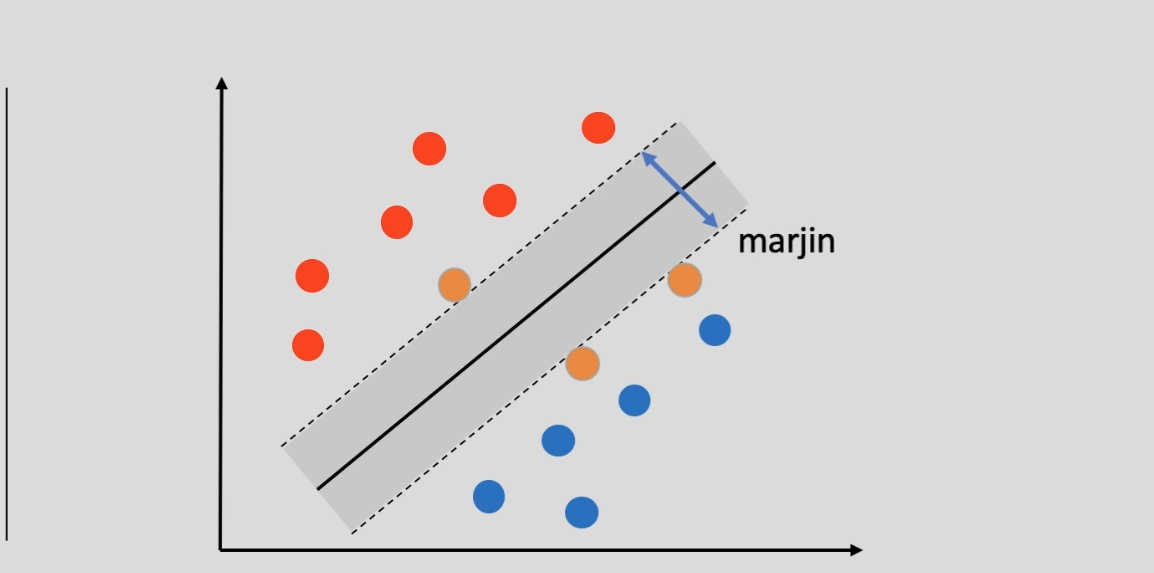

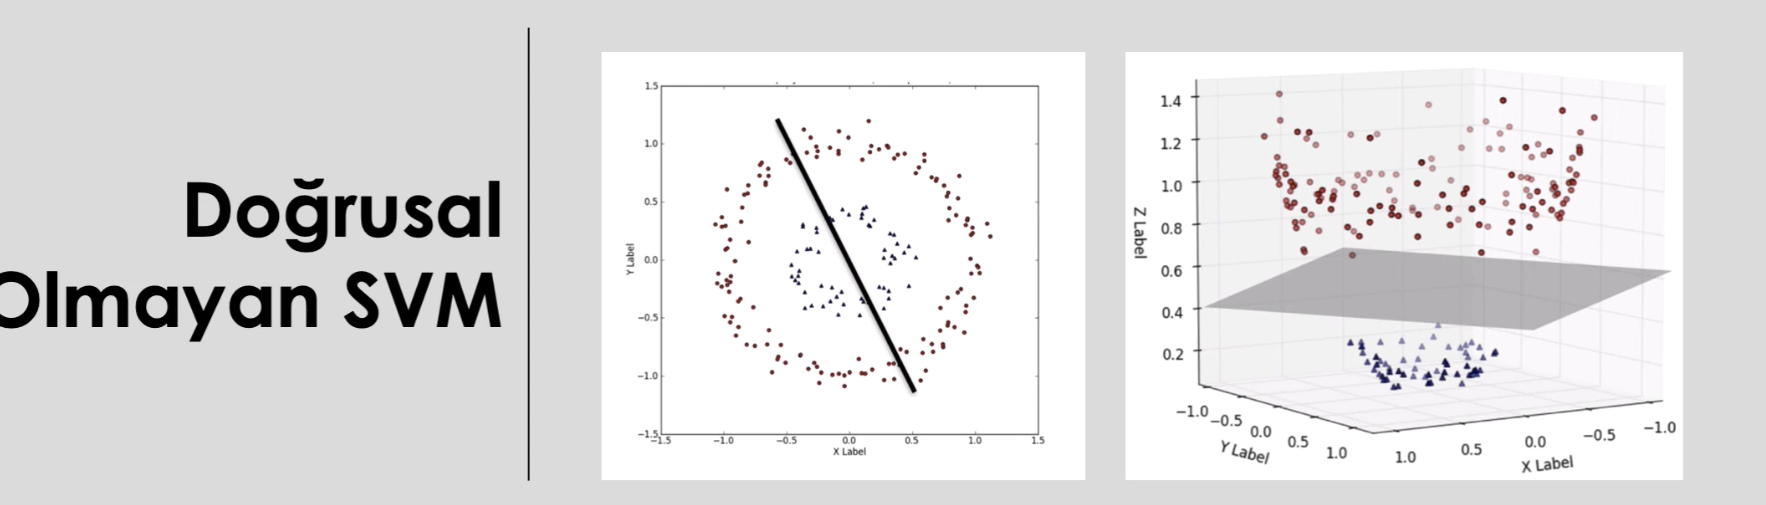

## Model & Tahmin

In [56]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [57]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [58]:
svm_model

SVC(kernel='linear')

In [59]:
y_pred = svm_model.predict(X_test)

In [60]:
accuracy_score(y_test, y_pred)

0.7445887445887446

## Model Tuning

In [61]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [63]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 1}


In [66]:
svc_tuned = SVC(kernel = "linear", C = 1).fit(X_train, y_train)

In [67]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

## RBF SVC

Doğrusal olmayan destek vektor
Radial 

## Model & Tahmin

In [68]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [69]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)

In [71]:
svc_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [72]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

## Model Tuning

In [73]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

In [78]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [79]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 10, 'gamma': 0.0001}


In [80]:
svc_tuned = SVC(C = 10, gamma = 0.0001).fit(X_train, y_train)

In [81]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

# Yapay Sinir Ağları

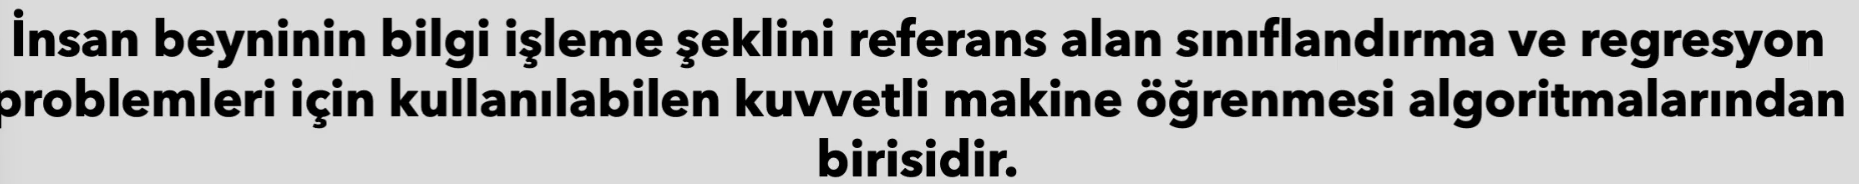

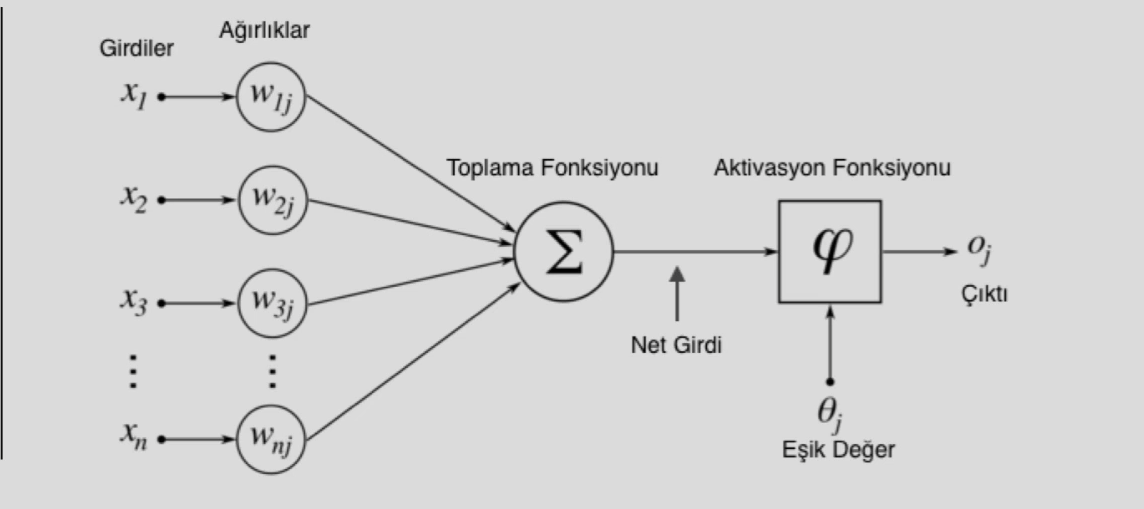

## Model & Tahmin

In [82]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [83]:
from sklearn.preprocessing import StandardScaler  

In [84]:
scaler = StandardScaler()

In [85]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
X_test_scaled[0:5]

array([[ 0.69748316, -0.70719864, -0.64639893,  0.81207927,  0.95720244,
         0.26575953, -0.11680393,  0.85019217],
       [-0.52953881, -0.27388818,  0.29399563,  0.74746428, -0.6936878 ,
         0.488933  , -0.94192338, -1.03426754],
       [-0.52953881, -0.39769117, -0.31449497, -1.3202154 , -0.6936878 ,
        -0.1543317 , -0.91266382, -1.03426754],
       [ 1.31099414, -0.42864191,  0.57058226, -1.3202154 , -0.6936878 ,
        -0.96825847,  1.12965312,  0.07927683],
       [ 1.00423865,  0.46892976,  1.12375553, -1.3202154 , -0.6936878 ,
        -0.27248236, -0.76051413,  1.44979298]])

In [87]:
from sklearn.neural_network import MLPClassifier

In [88]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [89]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7229437229437229

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       151
           1       0.60      0.59      0.59        80

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231



## Model Tuning

In [92]:
mlpc

MLPClassifier()

In [93]:
?mlpc

Type:        MLPClassifier
String form: MLPClassifier()
File:        d:\work\veribilimi\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperbolic tan function,
      returns f(x) = tanh(x).

    - 'relu', the rectified linear unit function,
      returns f(x) = max(0, x)

solver : {'lbfgs', 'sgd', 'adam'}, defa

In [94]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}


alpha: Bu, regülarizasyon terimi olarak bilinir. Yüksek alfa değerleri modelin aşırı uyumlu olmasını engellemeye yardımcı olabilir, yani modelin genelleştirme yeteneğini artırabilir. Değerlerinizi seçerken, genellikle küçük pozitif değerler kullanılır.

hidden_layer_sizes: Bu, gizli katmanların boyutlarını belirtir. Birçok katmanlı algılayıcının katmanları vardır: giriş katmanı, gizli katmanlar ve çıkış katmanı. Burada verilen değerler, her bir gizli katmandaki nöron sayısını belirtir. Örneğin, (10, 10, 10) üç gizli katmana sahip bir çok katmanlı algılayıcı oluşturur; her biri 10 nöron içerir.

solver: Bu, ağı eğitmek için kullanılan optimizasyon algoritmasını belirtir. Farklı optimizasyon algoritmaları, farklı veri setleri ve problemler için farklı şekilde performans gösterebilir. "lbfgs", "adam" ve "sgd" gibi yaygın kullanılan optimizasyon algoritmaları vardır.

activation: Bu, nöronların aktivasyon fonksiyonunu belirtir. Aktivasyon fonksiyonu, bir nöronun çıkışını hesaplamak için kullanılır. "relu" ve "logistic" gibi yaygın kullanılan aktivasyon fonksiyonları vardır. "relu" genellikle gizli katmanlarda tercih edilirken, "logistic" çıkış katmanında sınıflandırma problemleri için sıklıkla kullanılır.

In [95]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [96]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (5, 3), 'solver': 'lbfgs'}


In [100]:
mlpc_tuned = MLPClassifier(activation = "relu", 
                           alpha = 0.0001, 
                           hidden_layer_sizes = (5, 3),
                          solver = "lbfgs")

In [101]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(5, 3), solver='lbfgs')

In [102]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7445887445887446

In [104]:
confusion_matrix(y_test, y_pred)

array([[123,  28],
       [ 31,  49]], dtype=int64)

# CART

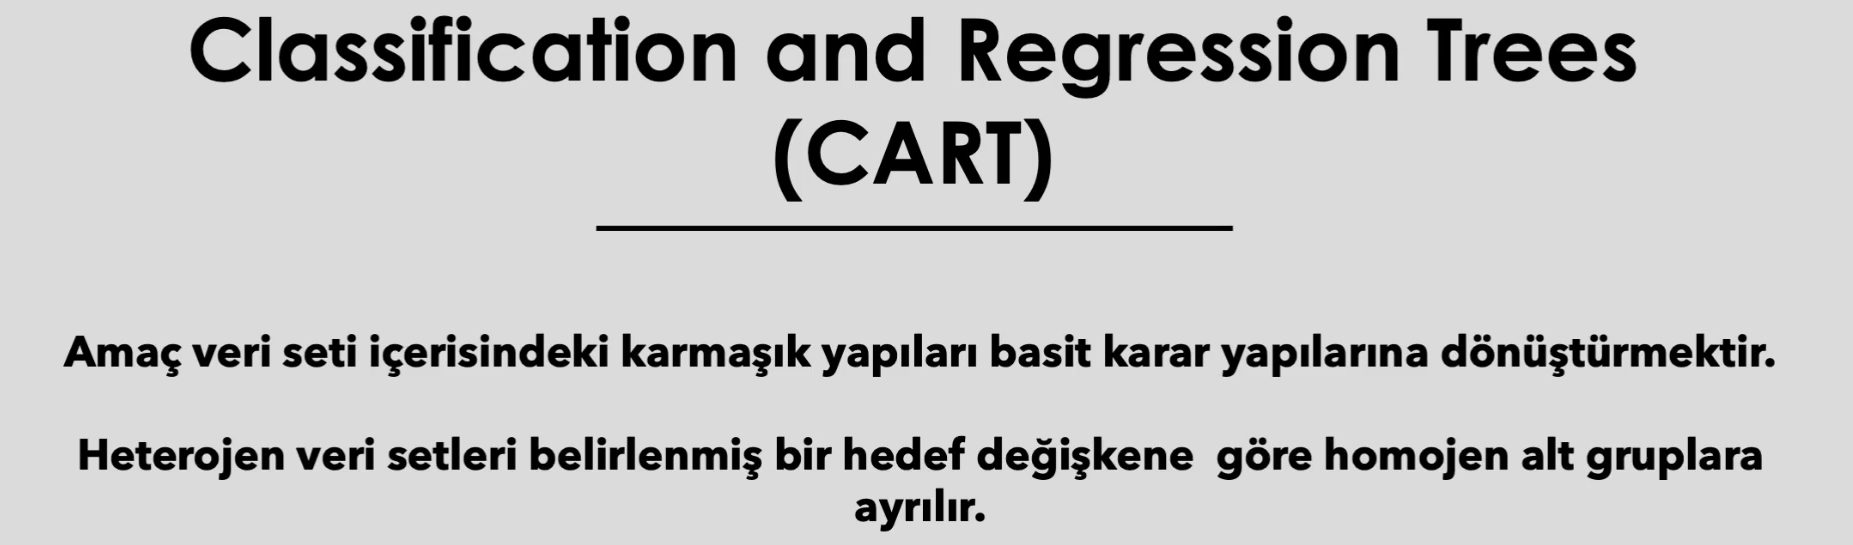

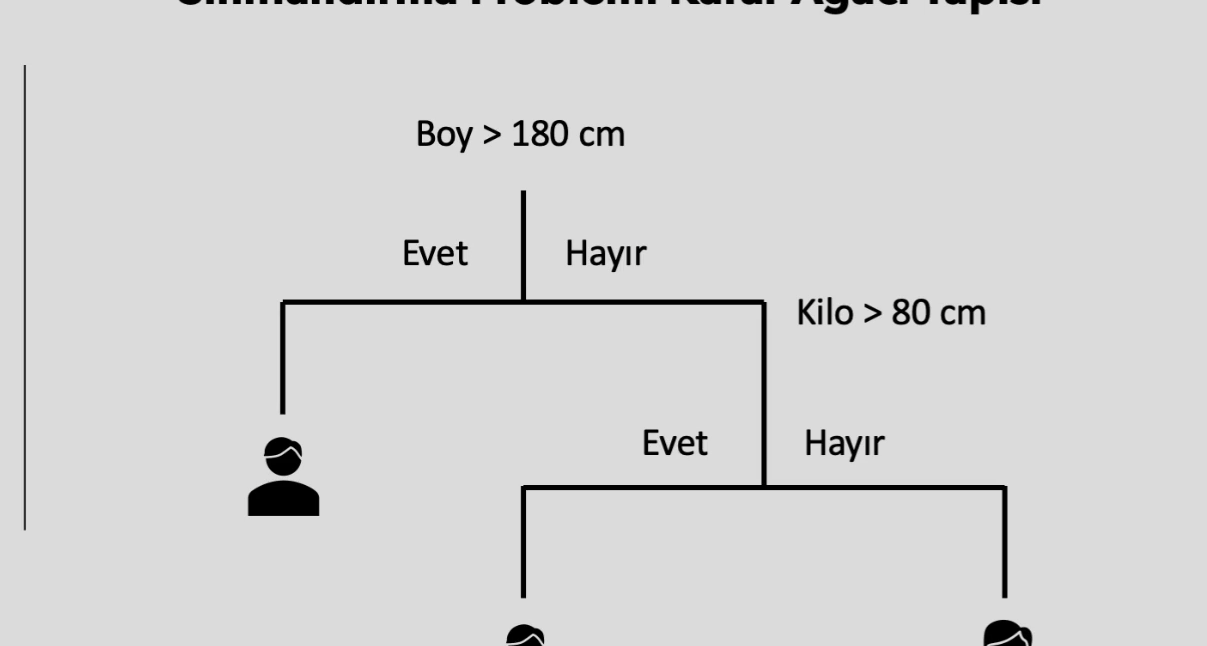

## Model & Tahmin

In [105]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [106]:
from sklearn.tree import DecisionTreeClassifier

In [107]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [108]:
cart_model

DecisionTreeClassifier()

In [109]:
#!pip install skompiler
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))

((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 40.5 else 1) if x[1
    ] <= 111.5 else ((1 if x[1] <= 123.0 else 0) if x[5] <= 
    37.39999961853027 else 0) if x[2] <= 72.0 else 1) if x[4] <= 9.0 else (
    0 if x[6] <= 0.6395000219345093 else 1 if x[6] <= 0.6759999990463257 else
    0) if x[0] <= 4.5 else 1 if x[7] <= 26.5 else 0) if x[5] <= 
    49.10000038146973 else 1) if x[1] <= 127.5 else 1 if x[2] <= 56.0 else 
    (0 if x[7] <= 27.5 else 1 if x[1] <= 138.0 else 0) if x[5] <= 
    30.300000190734863 else 1 if x[5] <= 32.000000953674316 else ((0 if x[5
    ] <= 33.75 else 1) if x[0] <= 0.5 else 1 if x[5] <= 32.45000076293945 else
    0) if x[2] <= 85.0 else 1) if x[7] <= 28.5 else (1 if x[7] <= 29.5 else
    (1 if x[7] <= 61.5 else 0) if x[5] <= 9.649999618530273 else 0 if x[1] <=
    133.0 else (0 if x[6] <= 0.21400000154972076 else 1) if x[2] <= 73.0 else
    0) if x[5] <= 26.94999980926513

In [110]:
x = [9]

In [111]:
((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)

1

In [112]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.70995670995671

## Model Tuning

In [113]:
cart_model

DecisionTreeClassifier()

In [114]:
?cart_model

Type:        DecisionTreeClassifier
String form: DecisionTreeClassifier()
File:        d:\work\veribilimi\.venv\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_split : int or float, default=

In [115]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [116]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


In [117]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

En iyi parametreler: {'max_depth': 5, 'min_samples_split': 19}


In [ ]:
#final

In [118]:
cart = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 19)
cart_tuned = cart.fit(X_train, y_train)

In [119]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

# Random Forests

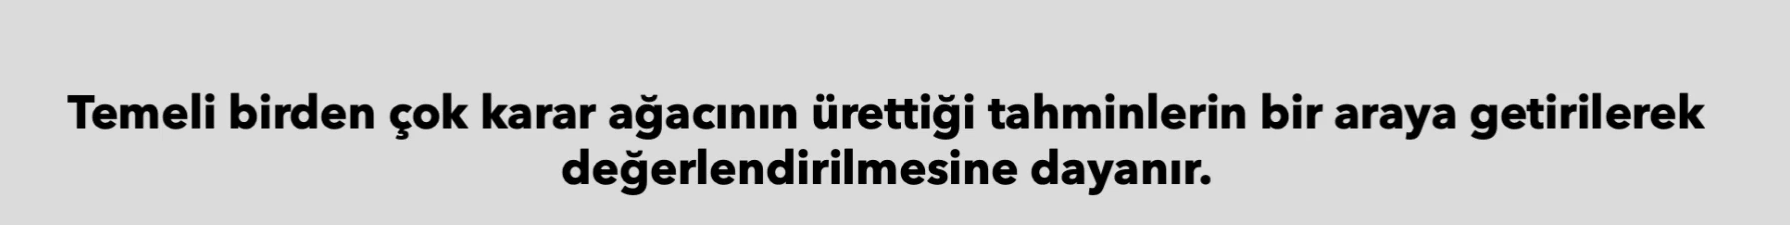

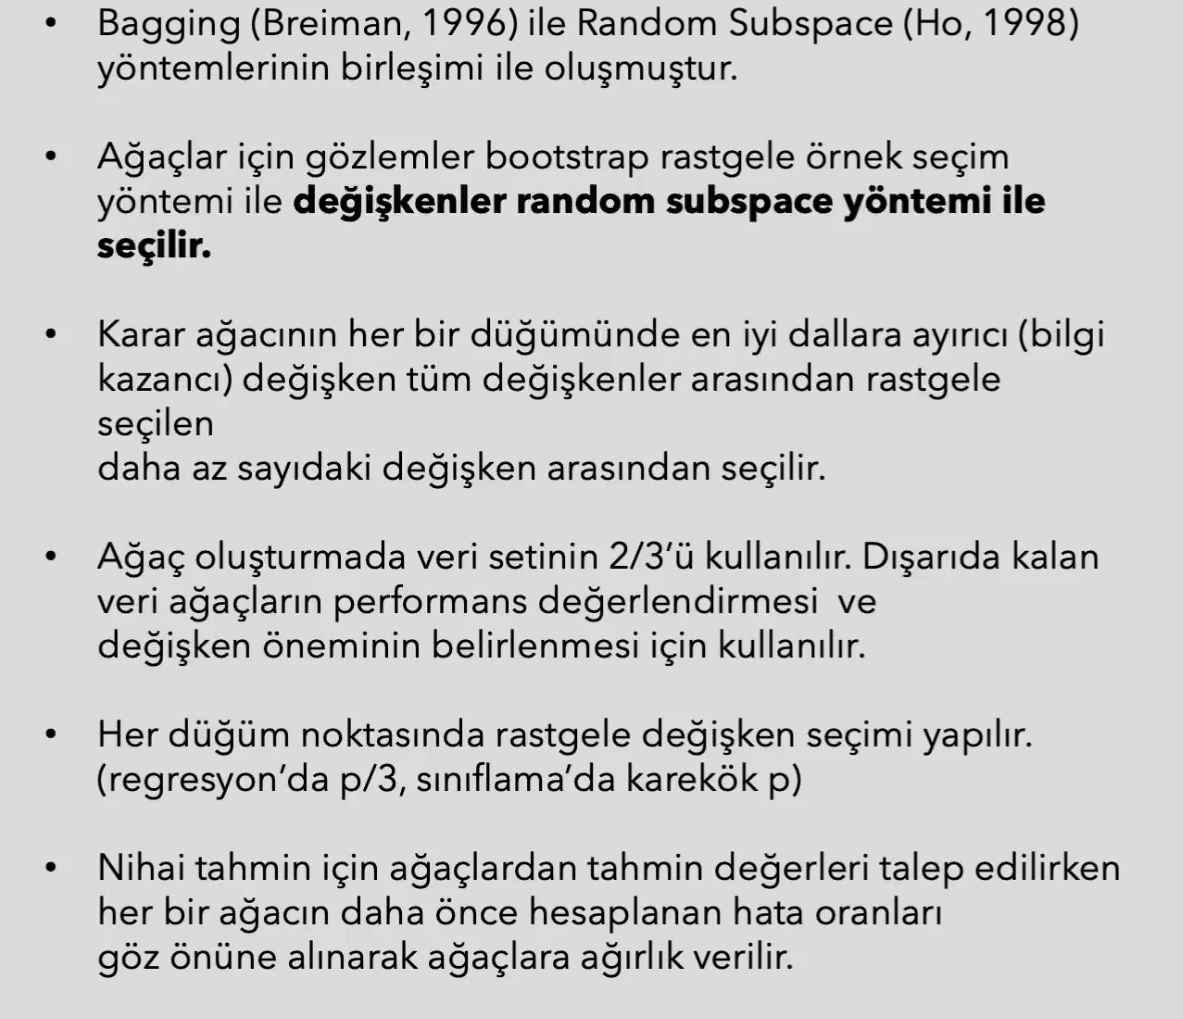

In [6]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [9]:
rf_model

RandomForestClassifier()

In [10]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

## Model Tuning

In [11]:
rf_model

RandomForestClassifier()

In [126]:
?rf_model

Type:        RandomForestClassifier
String form: RandomForestClassifier()
Length:      100
File:        d:\work\veribilimi\.venv\lib\site-packages\sklearn\ensemble\_forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

For a comparison between tree-based ensemble models see the example
:ref:`sphx_glr_auto_examples_ensemble_plot_forest_hist_grad_boosting_comparison.py`.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : {"gini

In [12]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [13]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [14]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [15]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 8, 'max_features': 8, 'min_samples_split': 5, 'n_estimators': 1000}


In [ ]:
#final

In [16]:
rf_tuned = RandomForestClassifier(max_depth = 8, 
                                  max_features = 8, 
                                  min_samples_split = 5,
                                  n_estimators = 1000)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features=8, min_samples_split=5,
                       n_estimators=1000)

In [17]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

In [18]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

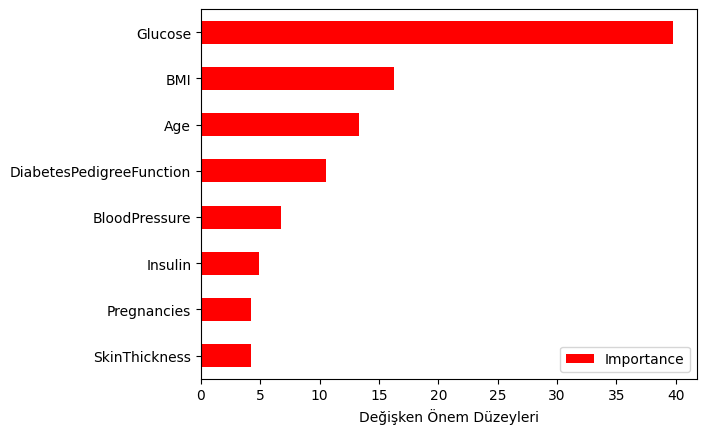

In [19]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# Gradient Boosting Machines

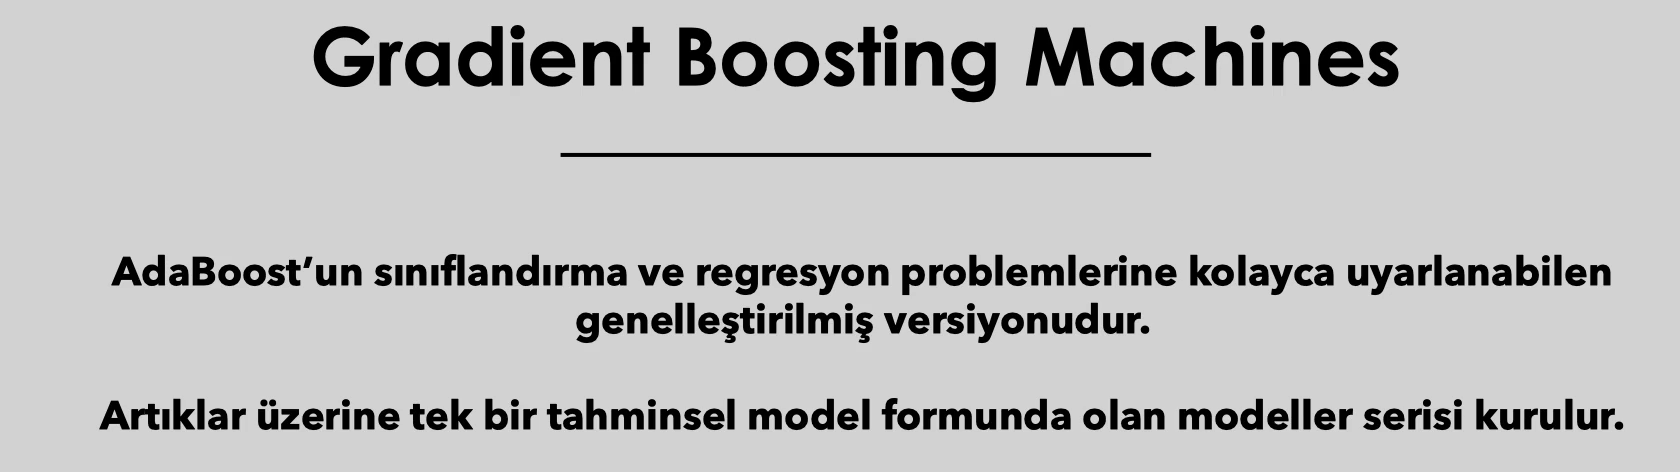

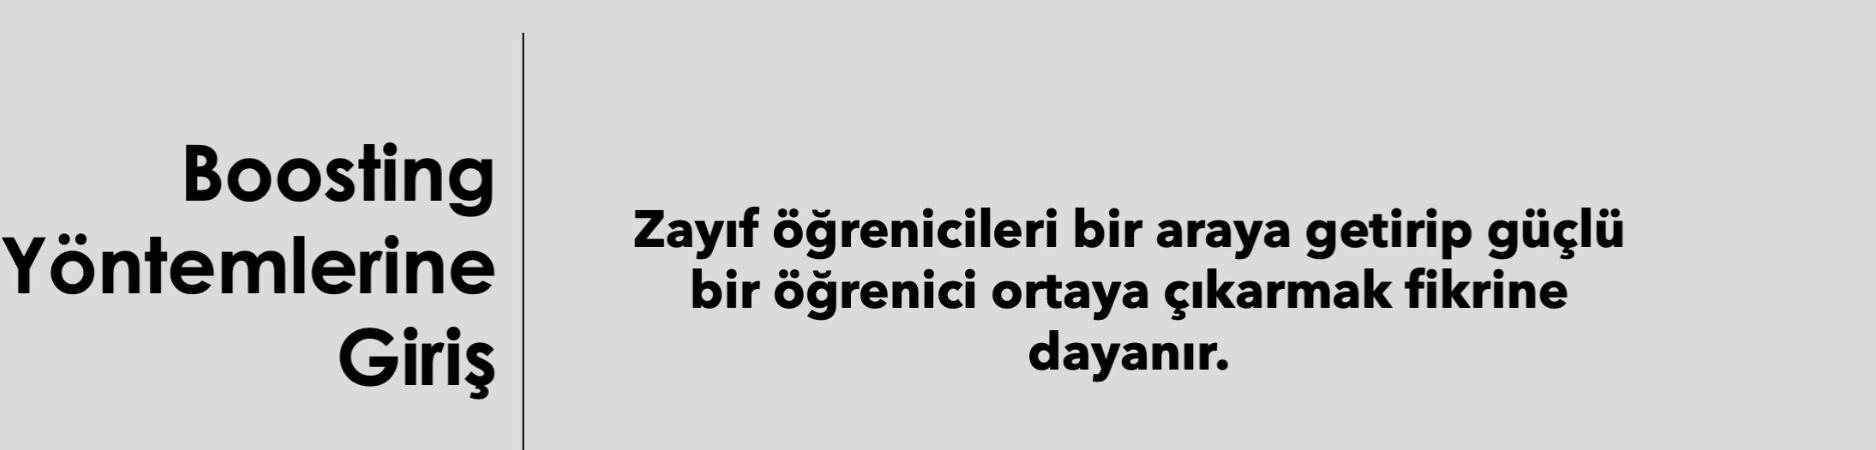

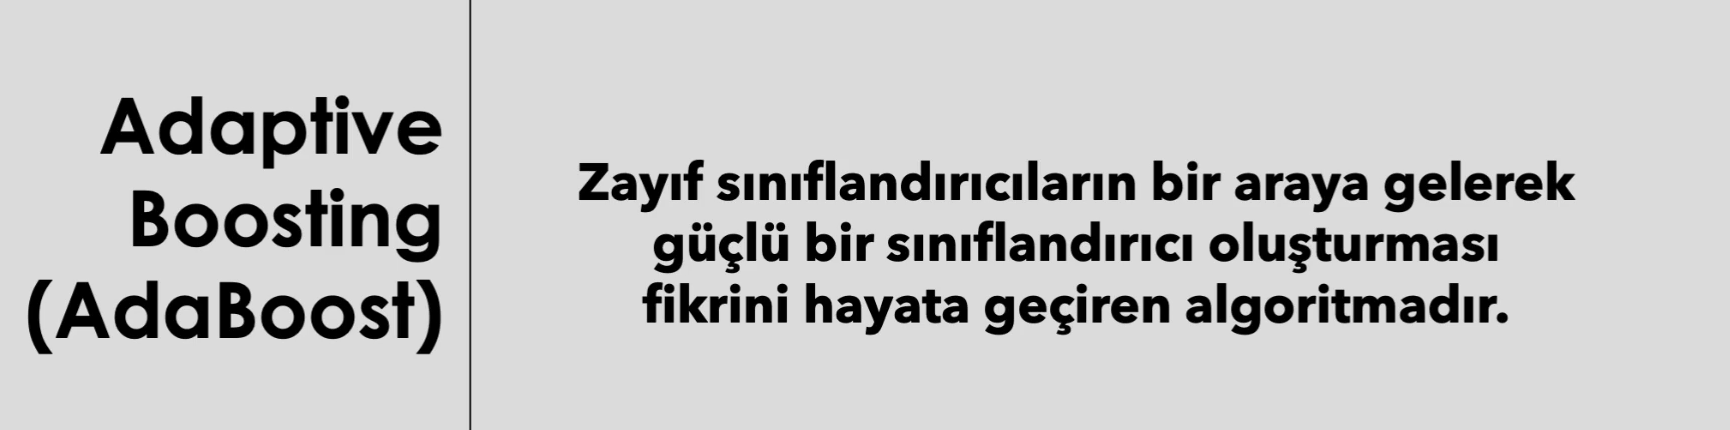

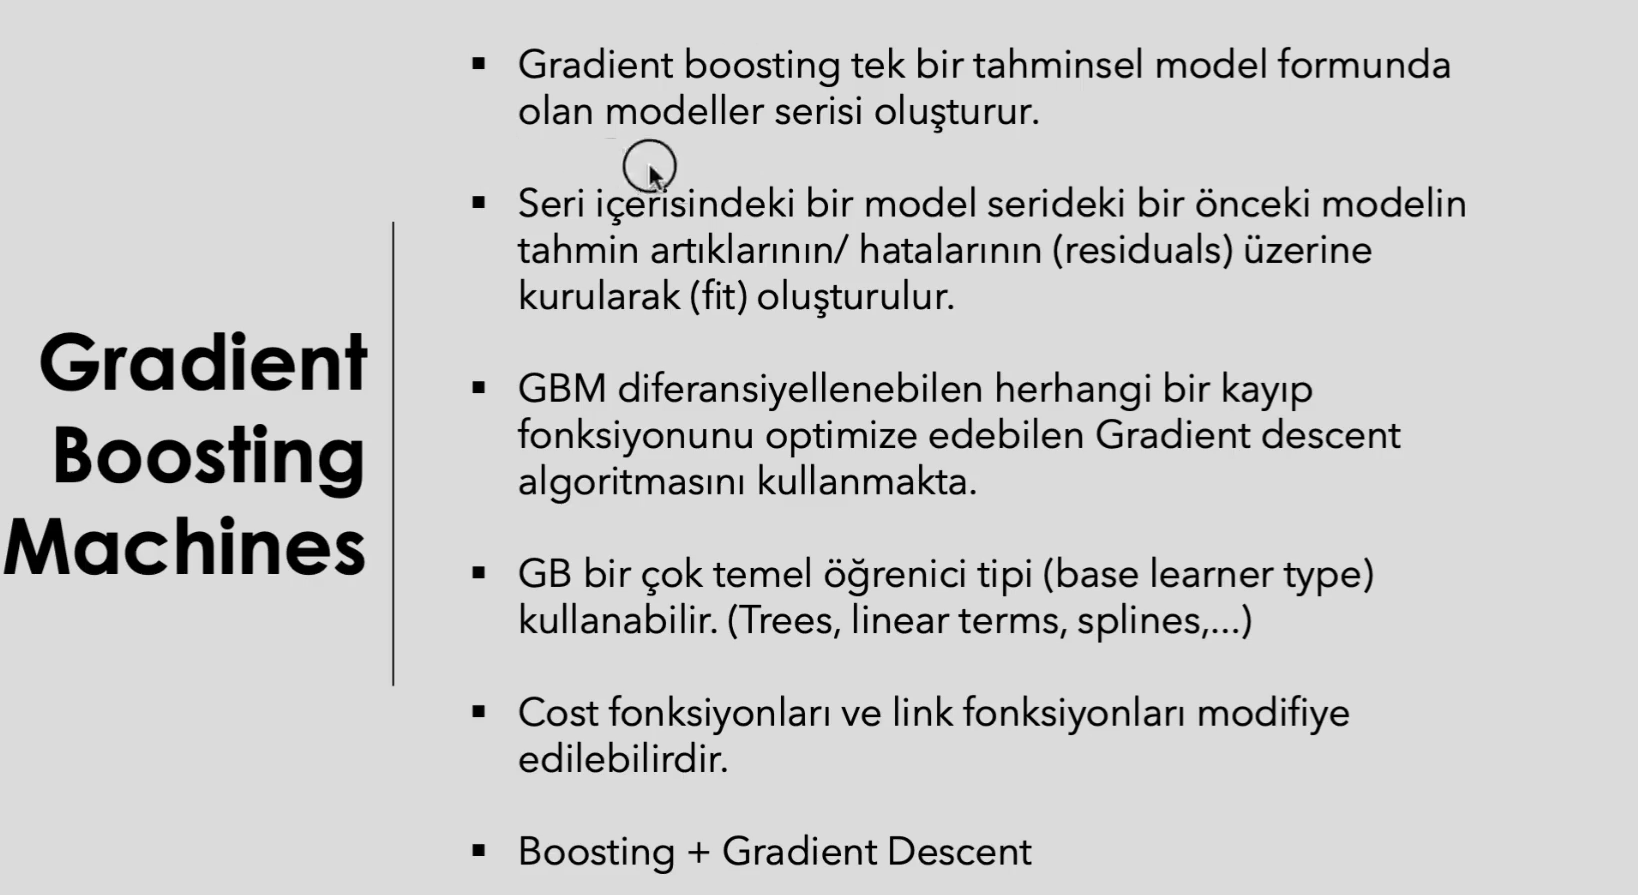


baggingde moddeller birbirinden bağımsız ağaçlar oluşturur, Random forest temelini bunun üzerine oluşturur

Boostingde ise tek bir tahminsel model tipinde modeller serisi oluşturur bunlar birbirine bağımlıdır 

In [3]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [4]:
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [6]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

## Model Tuning

In [7]:
gbm_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [144]:
?gbm_model

Type:        GradientBoostingClassifier
String form: GradientBoostingClassifier()
Length:      100
File:        d:\work\veribilimi\.venv\lib\site-packages\sklearn\ensemble\_gb.py
Docstring:  
Gradient Boosting for classification.

This algorithm builds an additive model in a forward stage-wise fashion; it
allows for the optimization of arbitrary differentiable loss functions. In
each stage ``n_classes_`` regression trees are fit on the negative gradient
of the loss function, e.g. binary or multiclass log loss. Binary
classification is a special case where only a single regression tree is
induced.

:class:`sklearn.ensemble.HistGradientBoostingClassifier` is a much faster
variant of this algorithm for intermediate datasets (`n_samples >= 10_000`).

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'log_loss', 'exponential'}, default='log_loss'
    The loss function to be optimized. 'log_loss' refers to binomial and
    multinomial deviance, the same a

In [8]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [9]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [10]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 100]},
             verbose=2)

In [12]:
print("En iyi parametreler: " + str(gbm_cv.best_params_))

En iyi parametreler: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 500}


In [13]:
gbm = GradientBoostingClassifier(learning_rate =0.01, 
                                 max_depth = 3,
                                min_samples_split = 2,
                                n_estimators = 500)

In [14]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [15]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

# XGBoost

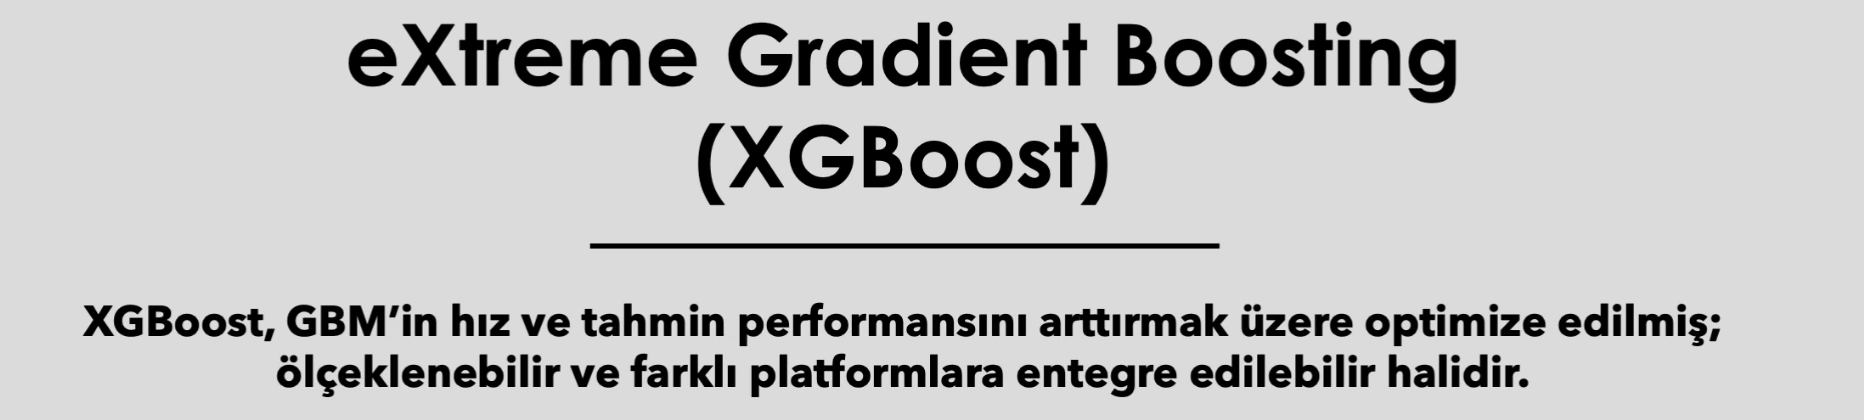

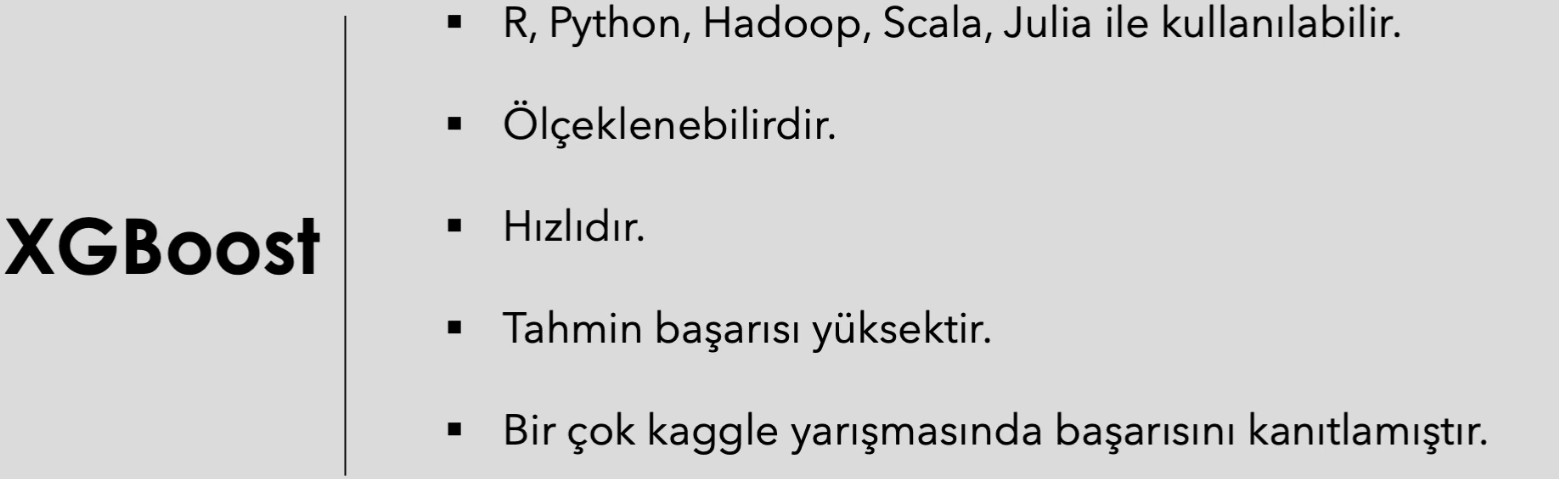

In [20]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [21]:
#!pip install xgboost
from xgboost import XGBClassifier

In [22]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [23]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [24]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7272727272727273

## Model Tuning

In [25]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [26]:
?xgb_model

Type:        XGBClassifier
String form:
XGBClassifier(base_score=None, booster=None, callbacks=None,
           colsample_bylevel=None <...> ne, n_estimators=None, n_jobs=None,
           num_parallel_tree=None, random_state=None, ...)
File:        d:\work\veribilimi\.venv\lib\site-packages\xgboost\sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost classification.
See :doc:`/python/sklearn_estimator` for more information.

Parameters
----------

    n_estimators : Optional[int]
        Number of boosting rounds.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
    max_leaves :
        Maximum number of leaves; 0 indicates no limit.
    max_bin :
        If using histogram-based algorithm, maximum number of bins per feature
    grow_policy :
        Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
        depth-wise. 1: favor splitting at nodes with highest loss change.
    learning_rate : Optional[float

In [27]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

In [28]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)

In [29]:
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [30]:
xgb_cv_model.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 1.0}

In [31]:
xgb = XGBClassifier(learning_rate = 0.05, 
                    max_depth = 3,
                    min_samples_split = 2,
                    n_estimators = 100,
                    subsample = 1.0)

In [32]:
xgb_tuned =  xgb.fit(X_train,y_train)

In [33]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7662337662337663

# LightGBM

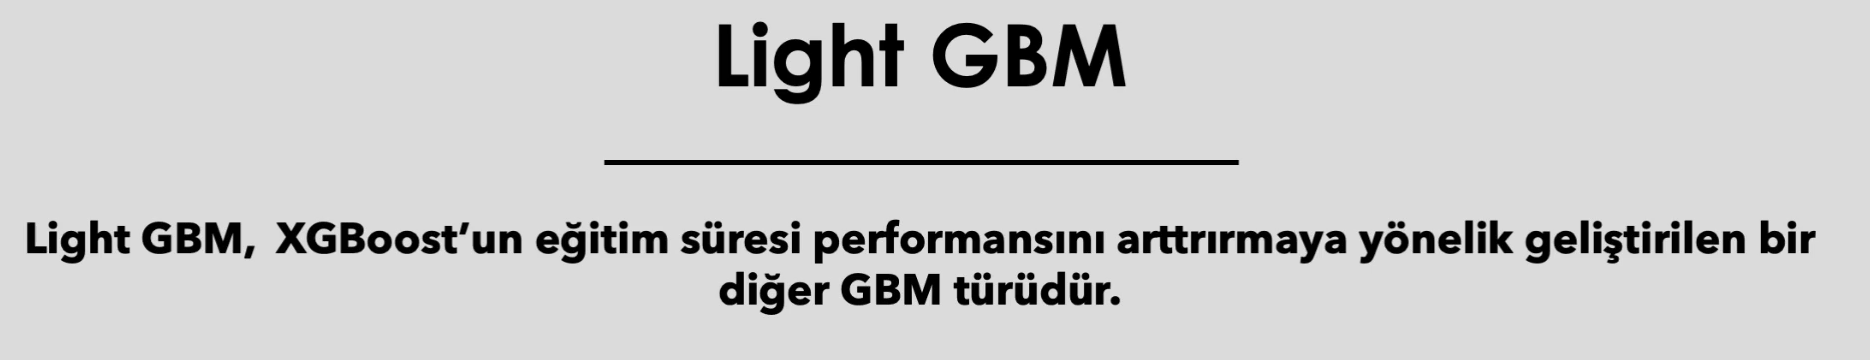

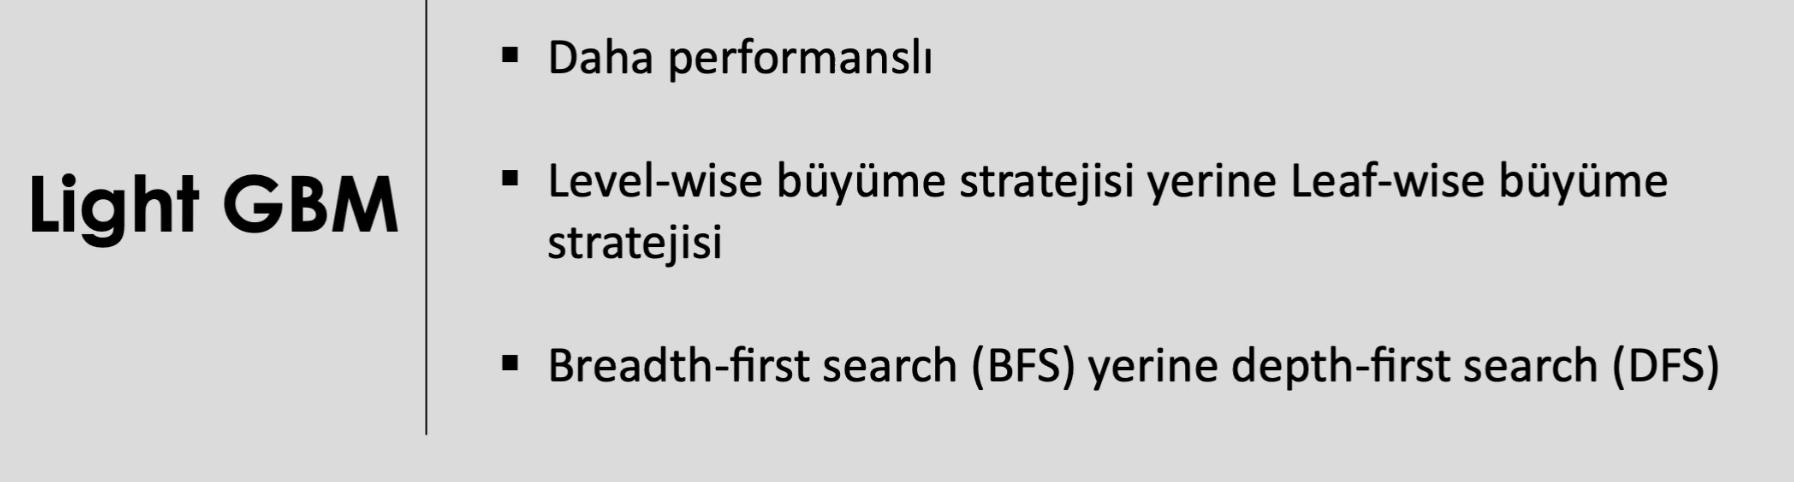

Light GBM'nin Çalışma Prensibi:

Light GBM, GBM gibi, bir dizi zayıf öğreniciyi birleştirerek güçlü bir öğrenici oluşturur. Zayıf öğrenciler, genellikle basit karar ağaçlarıdır. Light GBM, her zayıf öğrenciyi eğitmek için aşağıdaki adımları kullanır:

- Bir veri örneği kümesi rastgele seçilir.
- Seçilen veri örneği kümesi için bir karar ağacı eğitilir.
- Karar ağacı, hata fonksiyonunu en aza indirecek şekilde seçilir.

In [47]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [48]:
from lightgbm import LGBMClassifier

In [49]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [50]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7229437229437229

## Model Tuning

In [51]:
lgbm_model

LGBMClassifier()

In [52]:
?lgbm_model

Type:           LGBMClassifier
String form:    LGBMClassifier()
File:           d:\work\veribilimi\.venv\lib\site-packages\lightgbm\sklearn.py
Docstring:      LightGBM classifier.
Init docstring:
Construct a gradient boosting model.

Parameters
----------
boosting_type : str, optional (default='gbdt')
    'gbdt', traditional Gradient Boosting Decision Tree.
    'dart', Dropouts meet Multiple Additive Regression Trees.
    'rf', Random Forest.
num_leaves : int, optional (default=31)
    Maximum tree leaves for base learners.
max_depth : int, optional (default=-1)
    Maximum tree depth for base learners, <=0 means no limit.
learning_rate : float, optional (default=0.1)
    Boosting learning rate.
    You can use ``callbacks`` parameter of ``fit`` method to shrink/adapt learning rate
    in training using ``reset_parameter`` callback.
    Note, that this will ignore the ``learning_rate`` argument in training.
n_estimators : int, optional (default=100)
    Number of boosted trees to fit.


In [53]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [54]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)



In [55]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


KeyboardInterrupt: 

In [ ]:
lgbm_cv_model.best_params_

In [ ]:
lgbm = LGBMClassifier(learning_rate = 0.01, 
                       max_depth = 3,
                       subsample = 0.6,
                       n_estimators = 500,
                       min_child_samples = 20)

In [ ]:
lgbm_tuned = lgbm.fit(X_train,y_train)

In [ ]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

# CatBoost

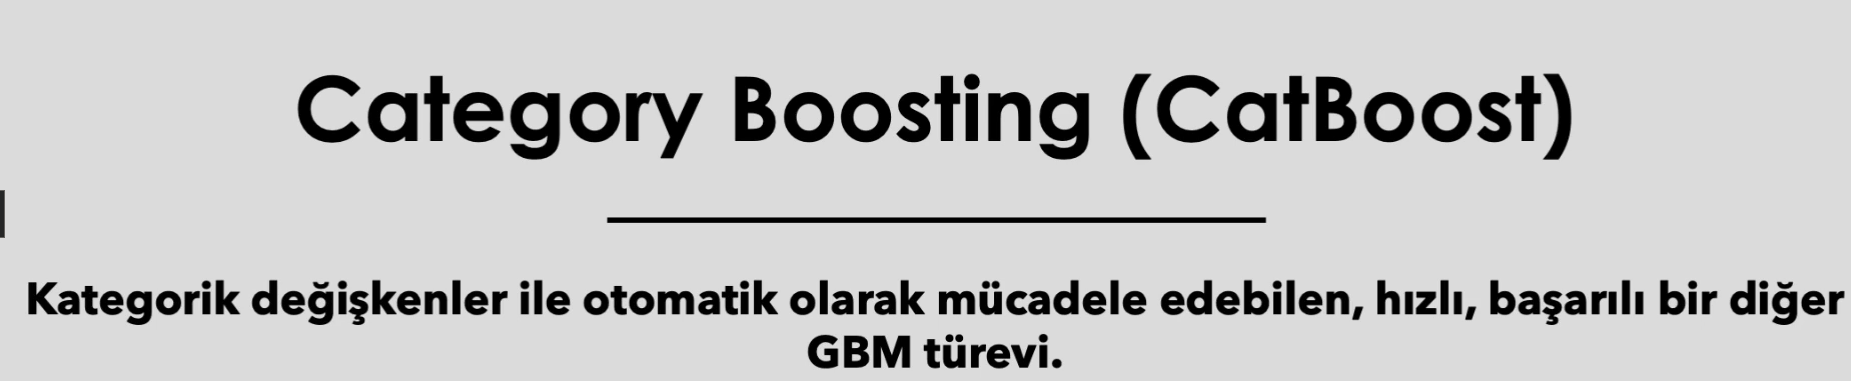

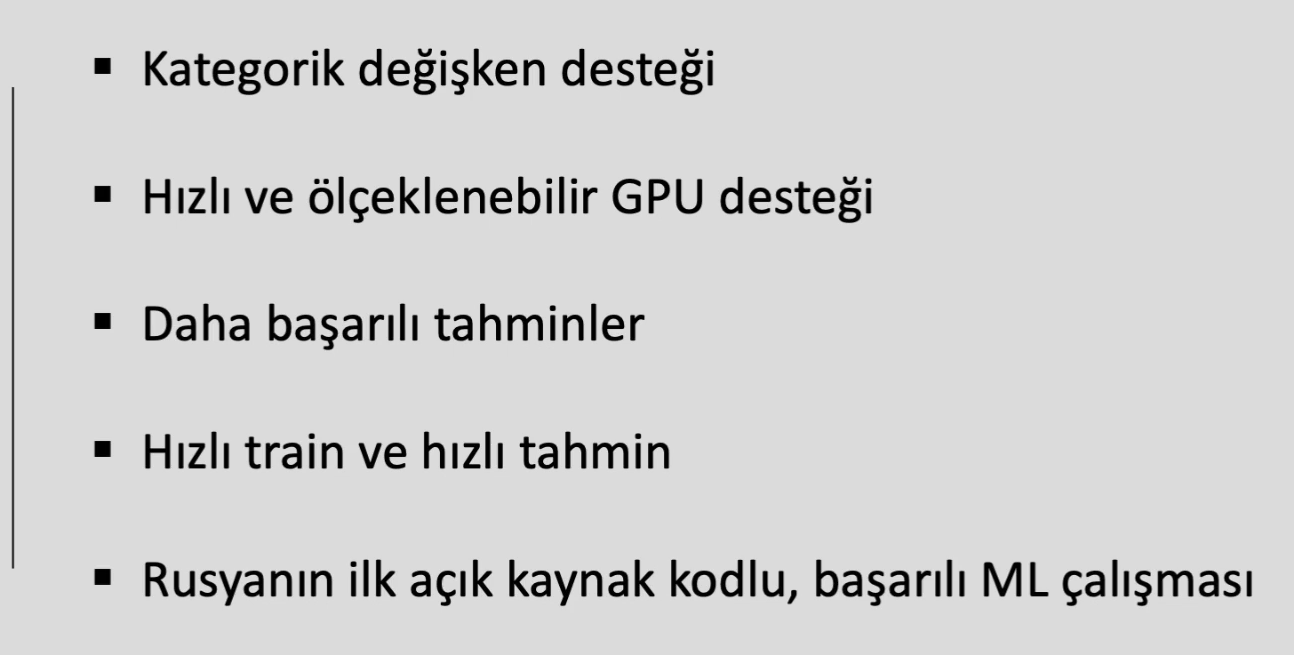

## Model & Tahmin

In [ ]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [ ]:
#!pip install catboost
from catboost import CatBoostClassifier

In [ ]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

In [ ]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

## Model Tuning

In [ ]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }

In [ ]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)
catb_cv_model.best_params_

In [ ]:
catb_cv_model.best_params_

In [ ]:
catb = CatBoostClassifier(iterations = 200, 
                          learning_rate = 0.05, 
                          depth = 5)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

In [ ]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

# Tüm Modellerin Karşılaştırılması

In [ ]:
modeller = [
    knn_tuned,
    loj_model,
    svc_tuned,
    nb_model,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

In [ ]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');    